In [1]:

%pylab nbagg
import copy
import random
import copy
import pickle
import os

Populating the interactive namespace from numpy and matplotlib


In [5]:
len_frame = 100
dt = 1
n_frame = len_frame / dt

In [3]:
datapath = 'qparamsweep/'

In [4]:
good = ['sweep-d0-l40-f0-a0-t1.p', 'sweep-d0-l10-f0-a0-t1.p', 
        'sweep-d0-l10-f0-a50-t1.p', 'sweep-d1-l40-f0-a0-t1.p',
        'sweep-d1-l10-f20-a200-t1.p', 'sweep-d-1-l40-f80-a50-t1.p',
        'sweep-d0-l40-f0-a0-t25.p', 'sweep-d0-l40-f0-a0-t25.p',
        'sweep-d1-l40-f0-a0-t1.p', 'sweep-d0-l10-f0-a50-t1.p', paths[ind_tot], paths[ind_len]]

NameError: name 'paths' is not defined

<IPython.core.display.Javascript object>


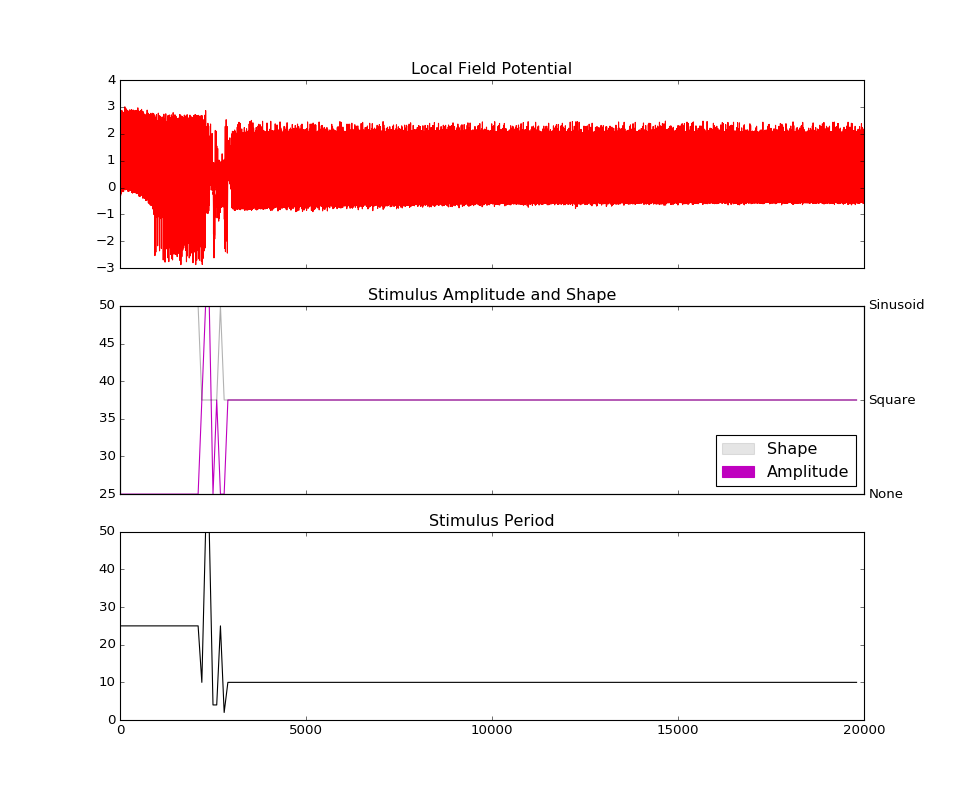

In [36]:
n = 11
readfile = open(datapath + good[n], 'r')
(params, (total_seizure_len, average_length, stim_time), t, d, tups ) = pickle.load(readfile)
readfile.close


states = []
rewards = []
action_amps = []
action_period = []
action_type = []
amps = []


for tup in tups:
    states.append(tup[0][0])
    rewards.append(tup[2])
    if tup[1][0] == 'non':
        action_amps.append(0)
        action_period.append(0)
        action_type.append(0)
    else:
        action_amps.append(tup[1][1])
        action_period.append(tup[1][2])
        if tup[1][0] == 'sin':
            action_type.append(2)
        if tup[1][0] == 'sqr':
            action_type.append(1)
            
        
            
    amps = np.concatenate((amps, translate_action(tup[1])))
    
f, axarr = plt.subplots(3, sharex=True, figsize = (12,10))

axarr[2].plot(100 * np.array(range(len(action_period))), action_period, 'k')    
axarr[2].set_title('Stimulus Period')

axarr[1].plot(100 * np.array(range(len(rewards))), 25*np.array(action_amps), 'm', label = "Amplitude")
axarr[1].set_title('Stimulus Amplitude and Shape')
#axarr[3].plot(100 * np.array(range(len(rewards))), np.array(action_type), 'c')
ax2 = axarr[1].twinx()


ax2.plot(100 * np.array(range(len(rewards))), np.array(action_type), 'k', alpha = 0.3, label = 'Shape')
ax2.set_yticks([0,1,2])
ax2.set_yticklabels(["None", "Square", "Sinusoid"])

#axarr[1].plot(100 * np.array(range(len(rewards))), rewards)
#axarr[1].set_title('Reward Function')


axarr[0].plot(d[3000:,0,9,0], 'r')
axarr[0].set_title('Local Field Potential')

k = matplotlib.patches.Patch(color='k', label = 'Shape', alpha = 0.1)
mag = matplotlib.patches.Patch(color='m', label = 'Amplitude')
legend(handles=[k,mag], loc = 4)

In [6]:
a1 = translate_action(('sqr', 1.5, 4, True, 4))
a2 = translate_action(('sin', 2.0, 50, True))

non = translate_action(('non',))

<IPython.core.display.Javascript object>


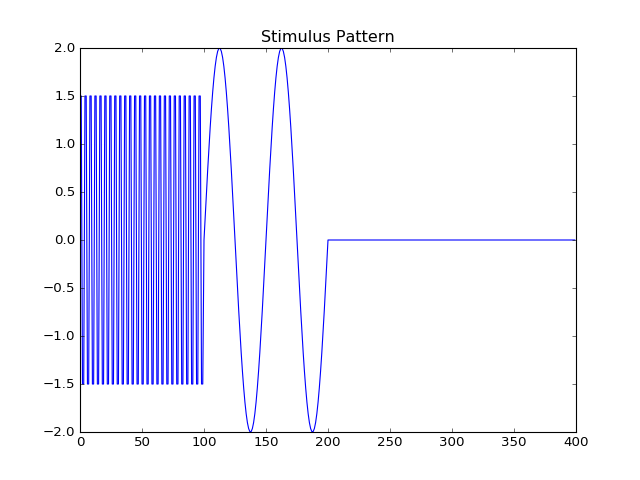

In [7]:
plot(np.concatenate((a1,a2,non,non)))
ylim((-2,2))
title('Stimulus Pattern')

In [3]:
def translate_action(action):
    
    if (len(action)) > 3:
        balance_charge = action[3]
    action_amps = []
    
    if action[0] == 'sin':
        wave_amp = action[1]
        period = action[2]        
        for i in range(n_frame):
            action_amps.append( wave_amp * np.sin( (2*np.pi / period) * i ))
        if balance_charge:
            action_amps[n_frame - 1] -= sum(action_amps)
    
    elif action[0] == 'sqr':
        wave_amp = action[1]
        period = action[2]
        pulse_width = action[4]
        for i in range(n_frame):
            if (i*dt) % period  == 0:
                amplitude = wave_amp
                
            elif (i*dt - pulse_width/2) % period == 0:
                amplitude = -wave_amp
            
            elif (i*dt - pulse_width) % period == 0:
                amplitude = 0
                
            action_amps.append(amplitude)
       
    elif action[0] == 'non':
        for i in range(n_frame):
            action_amps.append(0)
    

    
    return action_amps

In [8]:
def save_plot(d, amp, rew, tit, filename):
    fig, ax1 = pyplot.subplots(figsize=(15,5))
    ax2 = ax1.twinx()

    ax1.set_ylim(-3, 3)
    ax1.set_ylabel('LFP')
    ax2.set_ylim(-2, 2)
    ax2.set_ylabel('Stimulus')

    ax2.plot(amp, 'b', alpha = 0.3)
    ax1.plot(d[ic_buffer:,0,9,0], 'r')
    ax2.plot(len_frame * np.array(range(len(rew))), rew, 'g')

    red = matplotlib.patches.Patch(color='red', label = 'LFP')
    blue = matplotlib.patches.Patch(color='blue', label = 'Stimulus')
    legend(handles=[red,blue])
    
    title(tit)
    
    fig.savefig("qparamsweep/" + filename)
    
    #show()

In [11]:
done = os.listdir(datapath)

In [158]:
done

['sweep-d-1-l10-f0-a0-t1.p',
 'sweep-d-1-l10-f0-a0-t1.png',
 'sweep-d-1-l10-f0-a100-t1.p',
 'sweep-d-1-l10-f0-a100-t1.png',
 'sweep-d-1-l10-f0-a200-t1.p',
 'sweep-d-1-l10-f0-a200-t1.png',
 'sweep-d-1-l10-f0-a400-t1.p',
 'sweep-d-1-l10-f0-a400-t1.png',
 'sweep-d-1-l10-f0-a50-t1.p',
 'sweep-d-1-l10-f0-a50-t1.png',
 'sweep-d-1-l10-f20-a0-t1.p',
 'sweep-d-1-l10-f20-a0-t1.png',
 'sweep-d-1-l10-f20-a100-t1.p',
 'sweep-d-1-l10-f20-a100-t1.png',
 'sweep-d-1-l10-f20-a200-t1.p',
 'sweep-d-1-l10-f20-a200-t1.png',
 'sweep-d-1-l10-f20-a400-t1.p',
 'sweep-d-1-l10-f20-a400-t1.png',
 'sweep-d-1-l10-f20-a50-t1.p',
 'sweep-d-1-l10-f20-a50-t1.png',
 'sweep-d-1-l10-f40-a0-t1.p',
 'sweep-d-1-l10-f40-a0-t1.png',
 'sweep-d-1-l10-f40-a100-t1.p',
 'sweep-d-1-l10-f40-a100-t1.png',
 'sweep-d-1-l10-f40-a200-t1.p',
 'sweep-d-1-l10-f40-a200-t1.png',
 'sweep-d-1-l10-f40-a400-t1.p',
 'sweep-d-1-l10-f40-a400-t1.png',
 'sweep-d-1-l10-f40-a50-t1.p',
 'sweep-d-1-l10-f40-a50-t1.png',
 'sweep-d-1-l10-f80-a200-t1.p',
 'swee

In [ ]:
readfile = open(datapath + good[n], 'r')
(params, (total_seizure_len, average_length, stim_time), t, d, tups ) = pickle.load(readfile)
readfile.close

In [29]:
par = []
res = []
paths = []
i = 0
for thing in done:
    
    try: 
        readfile = open(datapath + thing, 'r')
        (params, (total_seizure_len, average_length, stim_time), t, d, tups ) = pickle.load(readfile)
        readfile.close
        par.append(params)
        res.append((total_seizure_len, average_length, stim_time))
        paths.append(thing)
        print i
        i += 1
    except: 
        print ""
    sys.stdout.flush()

0

1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18

19

20

21

22

23

24

25

26

27

28

29

30

31

32

33

34

35

36

37

38

39

40

41

42

43

44

45

46

47

48

49

50

51

52

53

54

55

56

57

58

59

60

61

62

63

64

65

66

67

68

69

70

71

72

73

74

75

76

77

78

79

80

81

82

83

84

85

86

87

88

89

90

91



In [30]:
for i in range(len(par)):
    if par[i][0] == 0.4 and par[i][1] == 0.0 and par[i][2] == 0.0:
        print par[i]
        print res[i]
        print "\n"

(0.4, 0.0, 0.0, 0.01)
(58, 1.0740740740740742, 199)


(0.4, 0.0, 0.0, 0.01)
(19, 2.111111111111111, 190)


(0.4, 0.0, 0.0, 1)
(75, 2.5, 162)


(0.4, 0.0, 0.0, 0.25)
(54, 1.9285714285714286, 155)


(0.4, 0.0, 0.0, 0.01)
(36, 2.4, 186)




In [31]:
min_len = 10000
min_tot = 10000

ind_len = 0
ind_tot = 0

for i in range(len(par)):
    #print res[i][0]
    if res[i][0] < min_len:
        min_len = res[i][0]
        ind_len = i
    if res[i][1] < min_tot:
        min_tot = res[i][1]
        ind_tot = i

In [33]:
print res[ind_tot]
print par[ind_tot]
print paths[ind_tot]

(49, 1.0, 51)
(0.1, 0.4, 0.0, 0.01)
sweep-d-1-l10-f40-a0-t1.p
